In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy import units as u

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('radialProfile.dat', usecols = (0,1), delim_whitespace = True, header = None, names = ['radius', 'surface_brigtness'])
df

,radius,surface_brigtness
0,0.000000,61.000000
1,1.000000,57.671875
2,1.414214,54.187500
3,2.000000,47.953125
4,2.236068,45.085938
...,...,...
6012,151.924323,0.018322
6013,151.953940,0.017483
6014,151.980262,0.019947
6015,151.990131,0.015104


In [3]:
radius_pixel = np.asarray(df['radius'])
surf_brig = np.asarray(df['surface_brigtness'])

In [4]:
prom_surf_brig = []
prom_rad_pixel = []

h = 2
bins = np.arange(np.min(radius_pixel), np.max(radius_pixel), h)
for i in bins:
    r_min = i
    r_max = i+h
    pos = np.where( (radius_pixel > r_min) & (radius_pixel < r_max))[0]
    prom_surf_brig.append(np.mean(surf_brig[pos]))
    prom_rad_pixel.append((i + (i+h))/2)

In [5]:
mean_surf_brig = np.asarray(prom_surf_brig)
mean_rad_pixel = np.asarray(prom_rad_pixel)
print(len(mean_surf_brig))
print(len(mean_rad_pixel))

76
76


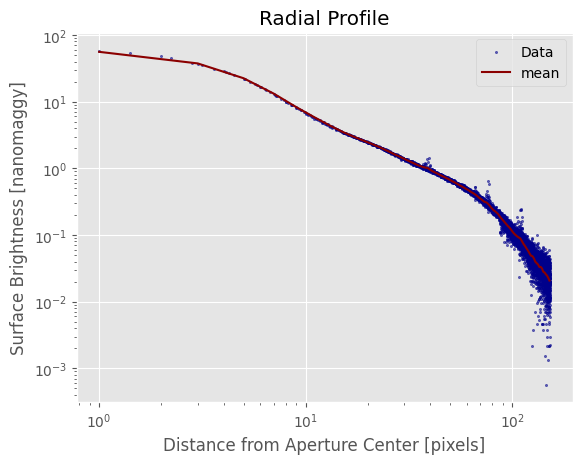

In [6]:
plt.scatter(radius_pixel, surf_brig, marker = '.', s = 10, color = 'darkblue', alpha = 0.6, label = 'Data')
plt.plot(mean_rad_pixel, mean_surf_brig, color = 'darkred', label = 'mean')
plt.title('Radial Profile')
plt.ylabel('Surface Brightness [nanomaggy]')
plt.xlabel('Distance from Aperture Center [pixels]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [7]:
radius_arcsec_1 = (((mean_rad_pixel*0.000109991635136)*u.deg).to(u.arcsec)).value

In [8]:
print(radius_arcsec_1)

[ 0.39596989  1.18790966  1.97984943  2.77178921  3.56372898  4.35566875
  5.14760852  5.9395483   6.73148807  7.52342784  8.31536762  9.10730739
  9.89924716 10.69118694 11.48312671 12.27506648 13.06700625 13.85894603
 14.6508858  15.44282557 16.23476535 17.02670512 17.81864489 18.61058467
 19.40252444 20.19446421 20.98640398 21.77834376 22.57028353 23.3622233
 24.15416308 24.94610285 25.73804262 26.52998239 27.32192217 28.11386194
 28.90580171 29.69774149 30.48968126 31.28162103 32.07356081 32.86550058
 33.65744035 34.44938012 35.2413199  36.03325967 36.82519944 37.61713922
 38.40907899 39.20101876 39.99295854 40.78489831 41.57683808 42.36877785
 43.16071763 43.9526574  44.74459717 45.53653695 46.32847672 47.12041649
 47.91235627 48.70429604 49.49623581 50.28817558 51.08011536 51.87205513
 52.6639949  53.45593468 54.24787445 55.03981422 55.831754   56.62369377
 57.41563354 58.20757331 58.99951309 59.79145286]


In [9]:
def sersic_func(x, Ie, Re, n):
    bn = (2*n) - (1/3) + 4/(405*n) + 46/(25515*n**2) + 131/(1148175*n**3) - 2194697/(30690717750*n**4)
    I_r = Ie*np.exp(-bn * ((x/Re)**(1/n) - 1) )
    return np.log10(I_r)

In [10]:
res, cov = curve_fit(sersic_func, radius_arcsec_1, np.log10(mean_surf_brig), maxfev = 1000000)
ef_int, ef_rad, n_ser = res[0], res[1], res[2]

In [11]:
print('El valor de n, es: ' + str(n_ser))
print('El valor de Re, es: ' + str(ef_rad))
print('El valor de Ie, es: ' + str(ef_int))

El valor de n, es: 2.3035011421856555
El valor de Re, es: 13.085193292726506
El valor de Ie, es: 1.4559714826413392


In [12]:
sersic_fit = sersic_func(radius_arcsec_1, ef_int, ef_rad, n_ser)
print(len(radius_arcsec_1))
print(len(sersic_fit))

76
76


In [13]:
chi_cuad = np.sum(((mean_surf_brig)-(10**sersic_fit))/(10**sersic_fit))
print(chi_cuad)

1.409329248785752


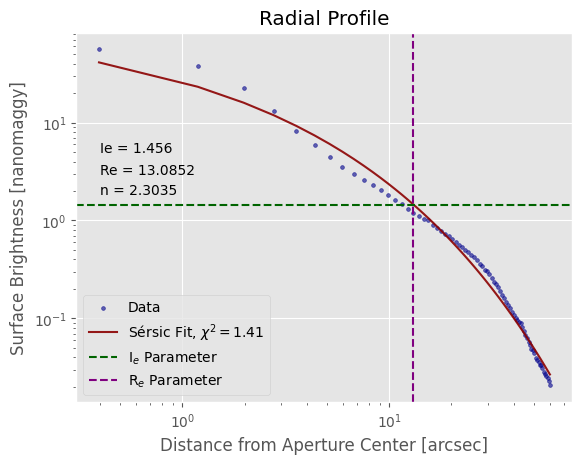

In [14]:
plt.scatter(radius_arcsec_1, mean_surf_brig, marker = '.', s = 30, color = 'darkblue', alpha = 0.6, label = 'Data')
plt.plot(radius_arcsec_1, 10**sersic_fit, color = 'darkred', ls = '-', label = 'Sérsic Fit, $\chi^2 = $' + str(round(chi_cuad, 2)), alpha = 0.9)
plt.axhline(ef_int, ls = '--', color = 'darkgreen', label = 'I$_e$ Parameter')
plt.axvline(ef_rad, ls = '--', color = 'purple', label = 'R$_e$ Parameter')
plt.title('Radial Profile')
plt.ylabel('Surface Brightness [nanomaggy]')
plt.xlabel('Distance from Aperture Center [arcsec]')
plt.xscale('log')
plt.yscale('log')
plt.text(0.4, 5, 'Ie = ' + str(round(ef_int, 4)))
plt.text(0.4, 3, 'Re = ' + str(round(ef_rad, 4)))
plt.text(0.4,1.85, 'n = ' + str(round(n_ser, 4)))
plt.legend()
plt.show()

In [15]:
radius_arcsec_2 = (((radius_pixel*0.000109991635136)*u.deg).to(u.arcsec)).value

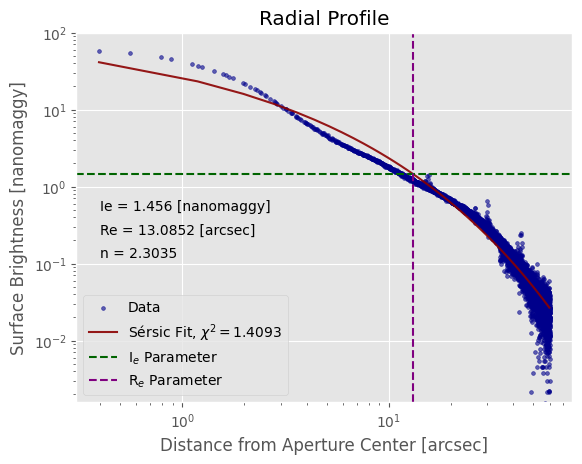

In [16]:
plt.scatter(radius_arcsec_2, surf_brig, marker = '.', s = 30, color = 'darkblue', alpha = 0.6, label = 'Data')
plt.plot(radius_arcsec_1, 10**sersic_fit, color = 'darkred', ls = '-', label = 'Sérsic Fit, $\chi^2 = $' + str(round(chi_cuad, 4)), alpha = 0.9)
plt.axhline(ef_int, ls = '--', color = 'darkgreen', label = 'I$_e$ Parameter')
plt.axvline(ef_rad, ls = '--', color = 'purple', label = 'R$_e$ Parameter')
plt.title('Radial Profile')
plt.ylabel('Surface Brightness [nanomaggy]')
plt.xlabel('Distance from Aperture Center [arcsec]')
plt.xscale('log')
plt.yscale('log')
plt.text(0.4, 0.5, 'Ie = ' + str(round(ef_int, 4)) + ' [nanomaggy]')
plt.text(0.4, 0.24, 'Re = ' + str(round(ef_rad, 4)) + ' [arcsec]')
plt.text(0.4, 0.12, 'n = ' + str(round(n_ser, 4)))
plt.ylim(10**(-2.8), 10**2)
plt.legend(fontsize = 10, loc = 'lower left')
plt.show()